In [8]:
import cv2
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
import matplotlib.pyplot as plt 
from skimage.transform import resize
import numpy as np
from tensorflow.keras.layers import RepeatVector , Reshape 
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
inception = InceptionResNetV2(weights=None, include_top=True)
inception.load_weights('./data/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
inception.graph = tf.get_default_graph()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#To generate embeddings of 1000*1 by passing input images through InceptionResNetV2
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    with inception.graph.as_default():
        embed = inception.predict(grayscaled_rgb_resized)
    return embed
import tensorflow as tf

In [4]:
from tensorflow import keras
model = keras.models.load_model('./color_model_V1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 73856       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 128)  147584      conv2d_1[0][0]                   
______________________________________________________________________________________________

In [12]:
# Util functions

def lab2RGB(l, ab):
    shape = (l.shape[0],l.shape[1],3)
    img = np.zeros(shape)
    img[:,:,0] = l[:,:,0]
    img[:,:,1:] = ab
    img = img.astype('uint8')
    print(img.max())
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img
def display(img):
    plt.figure()
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.show()

def get_RGB(image_l, image_ab  ):
       
    image_l = image_l.reshape((256, 256, 1))
    image_lab = np.concatenate((image_l, image_ab), axis=2)
    image_lab = image_lab.astype("uint8")
 
    image_rgb = cv2.cvtColor(image_lab, cv2.COLOR_LAB2RGB)
    image_rgb = Image.fromarray(image_rgb)
    return image_rgb





In [13]:
def get_rgb_prediction(img_path):
    test_img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    print (rgb_img.shape)

    display(rgb_img)

    img_lab = rgb2lab(test_img)
    img_lab = resize(img_lab, (256, 256, 3), mode='constant')
    
    img_lab = np.array(img_lab)
    
    img_lab_one = img_lab

    img_l = img_lab_one[:, :, 0]
    img_ab = img_lab_one[:, :, 1:]
    print(img_ab)

    display(img_l)

    incept_em = create_inception_embedding([img_l])
    embeddings = RepeatVector(32 * 32)(incept_em)
    layer_embedding_test = Reshape(([32, 32, 1000]))(embeddings)

    img_l = img_l.reshape((1, 256, 256, 1))

    output = model.predict([img_l,layer_embedding_test], steps=1)

    output = output * 128
    print(output)
    pred_rgb = get_RGB(img_l[0],output[0])
   
    return pred_rgb

In [19]:
def get_rgb_prediction_new(img_path):

    color_img = []
    color_img.append(img_to_array(load_img(img_path)))
    np.array(color_img, dtype=float)

    display(color_img[0])

    gray_me = gray2rgb(rgb2gray(1.0/255*color_img))

    color_me_embed = create_inception_embedding(gray_me)

    color_l = rgb2lab(1.0/255*color_img)[:,:,:,0]
    color_l = color_me.reshape(color_l.shape+(1,))



    display(color_l[0])



    color_me_embed = create_inception_embedding(gray_me)
    output = model.predict([color_l,layer_embedding_test], steps=1)

    output = output * 128
  
    pred_rgb = get_RGB(color_l[0],output[0])
   
    return pred_rgb



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


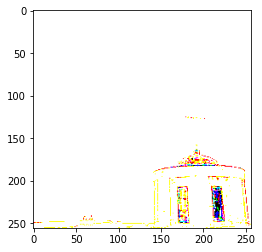

TypeError: can't multiply sequence by non-int of type 'float'

In [20]:
rgb_prediction = get_rgb_prediction_new('./data/images/Train/0AEYvu.jpg')
display(rgb_prediction)

[[[ 4.184435  69.50379  ]
  [ 4.184435  69.50379  ]
  [ 2.6950088 56.517754 ]
  ...
  [12.690264  51.962452 ]
  [20.12239   62.10695  ]
  [20.12239   62.10695  ]]

 [[ 4.184435  69.50379  ]
  [ 4.184435  69.50379  ]
  [ 2.6950088 56.517754 ]
  ...
  [12.690264  51.962452 ]
  [20.12239   62.10695  ]
  [20.12239   62.10695  ]]

 [[34.80884   70.752495 ]
  [34.80884   70.752495 ]
  [26.833708  56.5284   ]
  ...
  [16.107119  53.70703  ]
  [13.800559  63.447914 ]
  [13.800559  63.447914 ]]

 ...

 [[25.1937    77.816376 ]
  [25.1937    77.816376 ]
  [27.679787  68.241714 ]
  ...
  [24.327663  66.13005  ]
  [27.387558  67.741745 ]
  [27.387558  67.741745 ]]

 [[24.825417  75.1703   ]
  [24.825417  75.1703   ]
  [23.554104  68.62617  ]
  ...
  [24.618275  71.74679  ]
  [29.849812  68.03899  ]
  [29.849812  68.03899  ]]

 [[24.825417  75.1703   ]
  [24.825417  75.1703   ]
  [23.554104  68.62617  ]
  ...
  [24.618275  71.74679  ]
  [29.849812  68.03899  ]
  [29.849812  68.03899  ]]]
/Users/jus

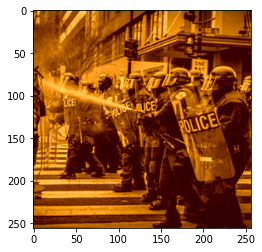

[[[ 4.243923  69.51045  ]
  [ 4.243923  69.51045  ]
  [ 2.7648103 56.594383 ]
  ...
  [12.671026  52.03386  ]
  [20.130997  62.159515 ]
  [20.130997  62.159515 ]]

 [[ 4.243923  69.51045  ]
  [ 4.243923  69.51045  ]
  [ 2.7648103 56.594383 ]
  ...
  [12.671026  52.03386  ]
  [20.130997  62.159515 ]
  [20.130997  62.159515 ]]

 [[34.802826  70.757225 ]
  [34.802826  70.757225 ]
  [26.79079   56.626175 ]
  ...
  [16.023285  53.701214 ]
  [13.729605  63.449326 ]
  [13.729605  63.449326 ]]

 ...

 [[25.20011   77.79613  ]
  [25.20011   77.79613  ]
  [27.694035  68.25616  ]
  ...
  [24.319225  66.12425  ]
  [27.348877  67.74405  ]
  [27.348877  67.74405  ]]

 [[24.828646  75.16194  ]
  [24.828646  75.16194  ]
  [23.56391   68.63297  ]
  ...
  [24.626122  71.71033  ]
  [29.833221  68.03649  ]
  [29.833221  68.03649  ]]

 [[24.828646  75.16194  ]
  [24.828646  75.16194  ]
  [23.56391   68.63297  ]
  ...
  [24.626122  71.71033  ]
  [29.833221  68.03649  ]
  [29.833221  68.03649  ]]]
/Users/jus

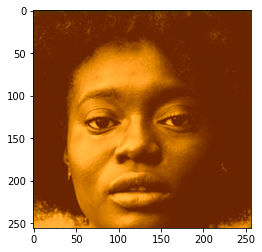

[[[ 4.431512  69.56967  ]
  [ 4.431512  69.56967  ]
  [ 2.9973965 56.71267  ]
  ...
  [12.724843  52.129154 ]
  [20.147469  62.217354 ]
  [20.147469  62.217354 ]]

 [[ 4.431512  69.56967  ]
  [ 4.431512  69.56967  ]
  [ 2.9973965 56.71267  ]
  ...
  [12.724843  52.129154 ]
  [20.147469  62.217354 ]
  [20.147469  62.217354 ]]

 [[34.85878   70.78299  ]
  [34.85878   70.78299  ]
  [26.81092   56.84197  ]
  ...
  [16.023365  53.808445 ]
  [13.736515  63.458744 ]
  [13.736515  63.458744 ]]

 ...

 [[25.175926  77.801926 ]
  [25.175926  77.801926 ]
  [27.684824  68.23578  ]
  ...
  [24.344685  66.11766  ]
  [27.325558  67.766914 ]
  [27.325558  67.766914 ]]

 [[24.828976  75.18745  ]
  [24.828976  75.18745  ]
  [23.536617  68.619644 ]
  ...
  [24.622028  71.70321  ]
  [29.803076  68.04788  ]
  [29.803076  68.04788  ]]

 [[24.828976  75.18745  ]
  [24.828976  75.18745  ]
  [23.536617  68.619644 ]
  ...
  [24.622028  71.70321  ]
  [29.803076  68.04788  ]
  [29.803076  68.04788  ]]]
/Users/jus

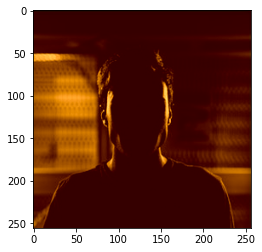

[[[ 4.2719727 69.508316 ]
  [ 4.2719727 69.508316 ]
  [ 2.765094  56.620354 ]
  ...
  [12.71517   52.07725  ]
  [20.129326  62.166466 ]
  [20.129326  62.166466 ]]

 [[ 4.2719727 69.508316 ]
  [ 4.2719727 69.508316 ]
  [ 2.765094  56.620354 ]
  ...
  [12.71517   52.07725  ]
  [20.129326  62.166466 ]
  [20.129326  62.166466 ]]

 [[34.802063  70.76745  ]
  [34.802063  70.76745  ]
  [26.771355  56.675774 ]
  ...
  [16.020283  53.726204 ]
  [13.729037  63.466095 ]
  [13.729037  63.466095 ]]

 ...

 [[25.18015   77.823814 ]
  [25.18015   77.823814 ]
  [27.663239  68.2273   ]
  ...
  [24.310928  66.09052  ]
  [27.3579    67.727806 ]
  [27.3579    67.727806 ]]

 [[24.82845   75.18459  ]
  [24.82845   75.18459  ]
  [23.539543  68.62077  ]
  ...
  [24.608826  71.72322  ]
  [29.85234   68.01729  ]
  [29.85234   68.01729  ]]

 [[24.82845   75.18459  ]
  [24.82845   75.18459  ]
  [23.539543  68.62077  ]
  ...
  [24.608826  71.72322  ]
  [29.85234   68.01729  ]
  [29.85234   68.01729  ]]]
/Users/jus

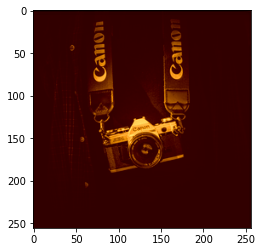

[[[ 4.331129  69.59381  ]
  [ 4.331129  69.59381  ]
  [ 2.9116235 56.597603 ]
  ...
  [12.666975  52.00341  ]
  [20.13838   62.12181  ]
  [20.13838   62.12181  ]]

 [[ 4.331129  69.59381  ]
  [ 4.331129  69.59381  ]
  [ 2.9116235 56.597603 ]
  ...
  [12.666975  52.00341  ]
  [20.13838   62.12181  ]
  [20.13838   62.12181  ]]

 [[34.845734  70.8065   ]
  [34.845734  70.8065   ]
  [26.852928  56.68024  ]
  ...
  [16.130966  53.78229  ]
  [13.846217  63.453163 ]
  [13.846217  63.453163 ]]

 ...

 [[25.185493  77.7929   ]
  [25.185493  77.7929   ]
  [27.688665  68.24666  ]
  ...
  [24.367216  66.18391  ]
  [27.327988  67.80745  ]
  [27.327988  67.80745  ]]

 [[24.831703  75.176605 ]
  [24.831703  75.176605 ]
  [23.548948  68.627396 ]
  ...
  [24.6539    71.708595 ]
  [29.789524  68.085724 ]
  [29.789524  68.085724 ]]

 [[24.831703  75.176605 ]
  [24.831703  75.176605 ]
  [23.548948  68.627396 ]
  ...
  [24.6539    71.708595 ]
  [29.789524  68.085724 ]
  [29.789524  68.085724 ]]]
/Users/jus

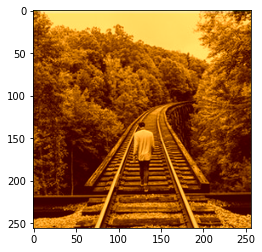

In [24]:
color_me = []
n = 0
for filename in os.listdir('./data/images/Test/'):
    if (n < 5):
        color_me.append(img_to_array(load_img('./data/images/Test/'+filename)))
        n += 1

color_me = np.array(color_me, dtype=float)
gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
color_me_embed = create_inception_embedding(gray_me)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))


# Test model

        
output = model.predict([color_me, color_me_embed])
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    print(output[i])
    
    ab_img = lab2rgb(cur)
    display(ab_img)
#     imsave("result/img_"+str(i)+".png", lab2rgb(cur))